Note book showing the usage of the coral stick

In [1]:
from edgetpu.detection.engine import DetectionEngine
from PIL import Image
import io

In [2]:
MODEL_FILE = "/home/robin/edgetpu/all_models/mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite"
LABEL_FILE = "/home/robin/edgetpu/all_models/coco_labels.txt"

IMG_FILE = "/home/robin/Github/coral-pi-rest-server/images/test-image3.jpg"

In [3]:
# Function to read labels from text files.
def ReadLabelFile(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
        ret = {}
        for line in lines:
            pair = line.strip().split(maxsplit=1)
            ret[int(pair[0])] = pair[1].strip()
    return ret


global engine, labels

In [4]:
engine = DetectionEngine(MODEL_FILE)
print("\n Loaded engine with model : {}".format(MODEL_FILE))


 Loaded engine with model : /home/robin/edgetpu/all_models/mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite


In [5]:
labels = ReadLabelFile(LABEL_FILE)
print("\n Loaded labels from file : {}".format(LABEL_FILE))


 Loaded labels from file : /home/robin/edgetpu/all_models/coco_labels.txt


In [6]:
image = Image.open(IMG_FILE)  # PIL img object.

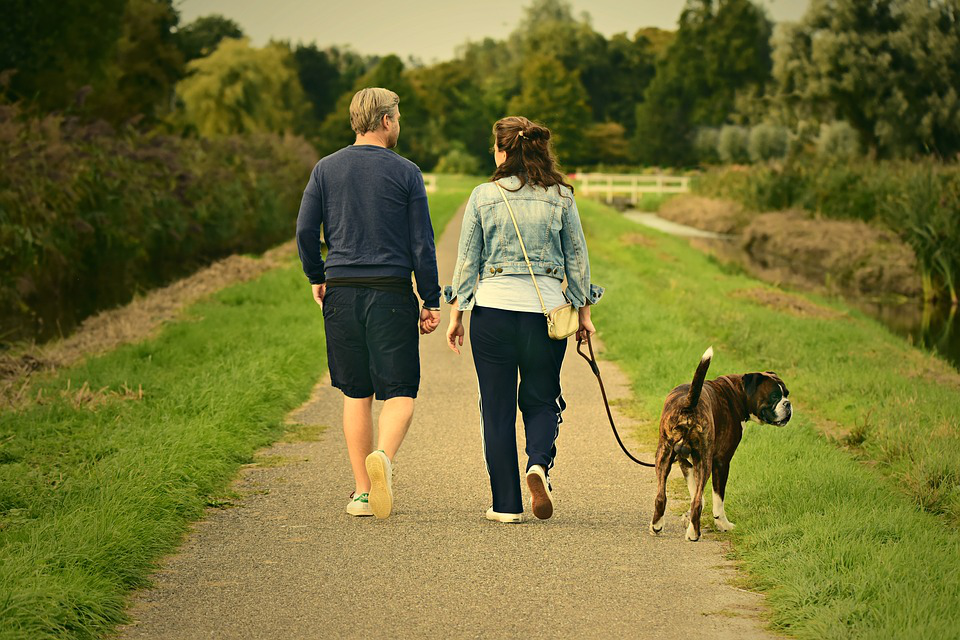

In [7]:
image

In [8]:
predictions = engine.DetectWithImage(
    image,
    threshold=0.05,
    keep_aspect_ratio=True,
    relative_coord=False,  # True = relative coordinates 0-1 of original image.
    top_k=10,
)

In [9]:
predictions

In [10]:
prediction_0 = predictions[0]

In [11]:
prediction_0.bounding_box

array([[447.69604683, 103.68103981],
       [601.93519592, 522.82081604]])

In [12]:
prediction_0.score

0.98828125

In [13]:
labels[prediction_0.label_id]

'person'